# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

### Analysis: Who, What, and How Framework

Based on the Storytelling With Data methodology, effective data communication requires answering three critical questions:

#### **Who: The Decision-Maker**
- **Target Audience:** Budget Committee or VP of Operations with authority to approve headcount
- **Relationship:** IT Manager (subject matter expert) presenting data-driven recommendations
- **Key Consideration:** Focus on decision-makers, not general audiences

#### **What: The Action, Mechanism, and Tone**
- **Desired Action:** Approve hiring of two full-time employees (FTEs) to backfill vacated positions
- **Mechanism:** Live presentation allowing real-time interaction and question handling
- **Tone:** Urgent and persuasive, emphasizing the growing problem that requires immediate solution
- **Critical Point:** Be specific about the action needed, otherwise the audience may find data "interesting" without taking action

#### **How: The Supporting Evidence**
- **Data Source:** Monthly ticket volume data from the past calendar year
- **Visual Evidence:** Line graph comparing "Ticket Volume Received" vs "Ticket Volume Processed"
- **Key Insight:** Since two employees quit in May, the team cannot keep up with incoming volume, creating a significant backlog
- **Visual Technique:** Use preattentive attributes (color, bold text) to highlight the gap in recent months proving understaffing

#### **Key Takeaway**
By clearly articulating these points before creating visualizations, we ensure the final communication focuses on the "pearls" of information the audience needs, rather than overwhelming them with exploratory data.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')
print(df.shape)
df.head()

(32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Summarize the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Check for duplicates

In [5]:
# check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# check if there are duplicate values in columns that should be unique
# this dataset doesn't have an ID column, so duplicates across all columns is what we check
df[df.duplicated()].head()

Duplicate rows: 165


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4


### Mean, median, and mode of each column

In [6]:
# mean and median for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
print("=== Mean ===")
print(df[numeric_cols].mean())
print("\n=== Median ===")
print(df[numeric_cols].median())

=== Mean ===
person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

=== Median ===
person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64


In [7]:
# mode for all columns
print("=== Mode ===")
print(df.mode().iloc[0])

=== Mode ===
person_age                           23
person_income                     60000
person_home_ownership              RENT
person_emp_length                   0.0
loan_intent                   EDUCATION
loan_grade                            A
loan_amnt                         10000
loan_int_rate                      7.51
loan_status                           0
loan_percent_income                 0.1
cb_person_default_on_file             N
cb_person_cred_hist_length            2
Name: 0, dtype: object


### Missing / null values

In [8]:
# count missing values per column
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Total missing values: 4011


In [9]:
# fill missing values with median for numeric columns
# person_emp_length and loan_int_rate have nulls based on the data types
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# verify no more missing values
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


### Identify inconsistent data

In [10]:
# check for unrealistic ages (too young for a loan or impossibly old)
print("Age range:", df['person_age'].min(), "-", df['person_age'].max())
print("Rows with age > 100:", len(df[df['person_age'] > 100]))

# check for unrealistic employment length (longer than possible given age)
print("\nEmp length range:", df['person_emp_length'].min(), "-", df['person_emp_length'].max())
print("Rows where emp_length > age - 16:", len(df[df['person_emp_length'] > df['person_age'] - 16]))

Age range: 20 - 144
Rows with age > 100: 5

Emp length range: 0.0 - 123.0
Rows where emp_length > age - 16: 740


In [11]:
# remove rows with age > 100 since those are likely data entry errors
df = df[df['person_age'] <= 100]
print("Shape after removing age outliers:", df.shape)

Shape after removing age outliers: (32576, 12)


### Encode categorical variables

In [12]:
# show categorical columns and their unique values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    print()

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']

cb_person_default_on_file: ['Y' 'N']



In [13]:
# one-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape after encoding: (32576, 23)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


### Check for class imbalance

In [14]:
# loan_status is the target variable (0 = no default, 1 = default)
print("loan_status value counts:")
print(df['loan_status'].value_counts())
print()
print("loan_status percentages:")
print(df['loan_status'].value_counts(normalize=True).round(3) * 100)

loan_status value counts:
loan_status
0    25468
1     7108
Name: count, dtype: int64

loan_status percentages:
loan_status
0    78.2
1    21.8
Name: proportion, dtype: float64


### Visualizations

In [15]:
import matplotlib.pyplot as plt

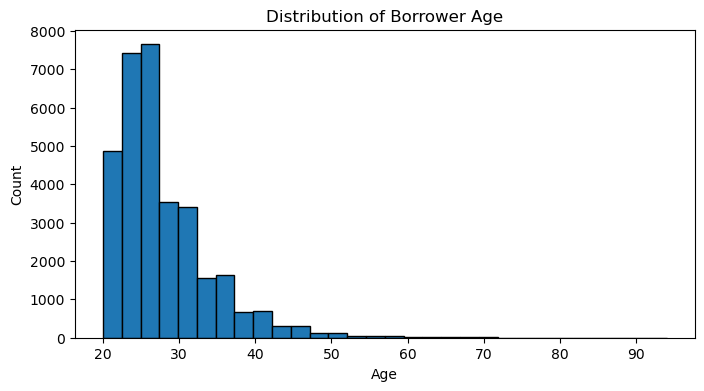

In [16]:
# distribution of age
plt.figure(figsize=(8, 4))
plt.hist(df['person_age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Borrower Age')
plt.show()

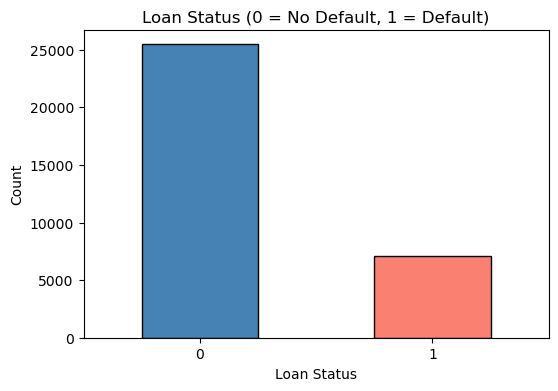

In [17]:
# loan status bar chart - shows class imbalance
plt.figure(figsize=(6, 4))
df['loan_status'].value_counts().plot(kind='bar', color=['steelblue', 'salmon'], edgecolor='black')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status (0 = No Default, 1 = Default)')
plt.xticks(rotation=0)
plt.show()

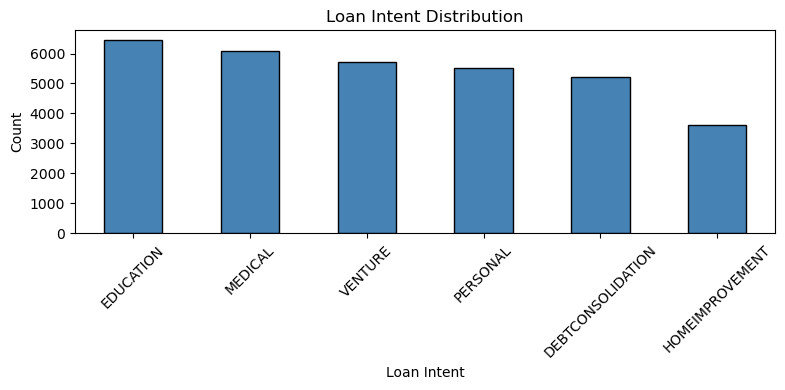

In [18]:
# loan intent breakdown
plt.figure(figsize=(8, 4))
df['loan_intent'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

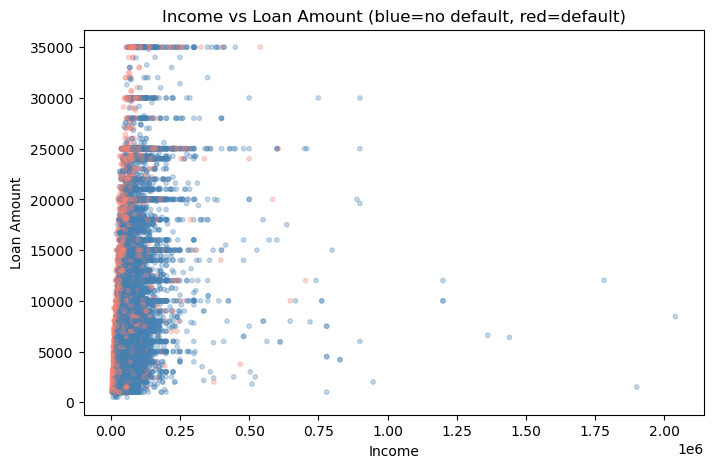

In [19]:
# income vs loan amount, colored by loan status
plt.figure(figsize=(8, 5))
colors = df['loan_status'].map({0: 'steelblue', 1: 'salmon'})
plt.scatter(df['person_income'], df['loan_amnt'], c=colors, alpha=0.3, s=10)
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount (blue=no default, red=default)')
plt.show()

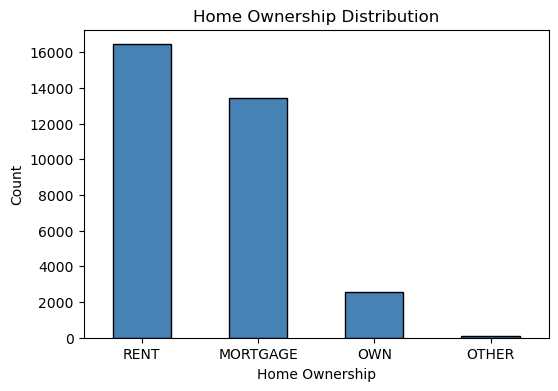

In [20]:
# home ownership breakdown
plt.figure(figsize=(6, 4))
df['person_home_ownership'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership Distribution')
plt.xticks(rotation=0)
plt.show()

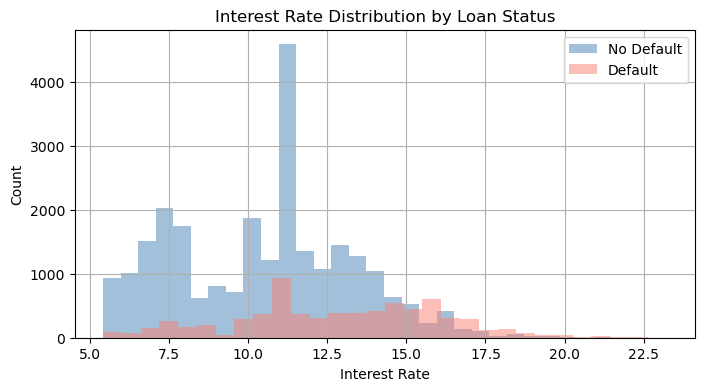

In [21]:
# loan interest rate distribution by loan status
plt.figure(figsize=(8, 4))
df[df['loan_status'] == 0]['loan_int_rate'].hist(bins=30, alpha=0.5, label='No Default', color='steelblue')
df[df['loan_status'] == 1]['loan_int_rate'].hist(bins=30, alpha=0.5, label='Default', color='salmon')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Interest Rate Distribution by Loan Status')
plt.legend()
plt.show()

### Conclusions

**Are the data usable?**

Yes. The dataset started with 32,581 rows and 12 columns, which is a good size for analysis. After cleaning we still have 32,576 rows so we didn't lose much data. The columns cover personal info (age, income, home ownership, employment length), loan details (intent, grade, amount, interest rate), and credit history, which gives us enough features to work with for predicting loan default.

**Modifications and corrections made:**

- **Missing values:** `person_emp_length` had 895 missing values and `loan_int_rate` had 3,116 missing values (4,011 total). I filled both with their median values instead of mean because median is less affected by outliers in skewed data like income and interest rates.
- **Inconsistent data:** Found 5 rows with `person_age` > 100 (max was 144), which are clearly data entry errors since nobody that old would be applying for a loan. Removed those rows. Also found 740 rows where `person_emp_length` > `person_age` - 16, meaning they started working before age 16. The worst case was someone with 123 years of employment at age 22, which is obviously wrong.
- **Duplicates:** Found 165 duplicate rows. Since there's no unique ID column, these could be real duplicates or just people with identical info. Worth investigating further but kept them for now.

**Class imbalance:**

There is a clear class imbalance in `loan_status`:
- No default (0): 25,468 rows (78.2%)
- Default (1): 7,108 rows (21.8%)

This is roughly a 3.6:1 ratio. If we build a model to predict defaults, a naive classifier could just predict "no default" every time and get 78% accuracy while being completely useless. To handle this we could use techniques like SMOTE oversampling, undersampling the majority class, or adjusting class weights in the model.

Other imbalances worth noting from the visualizations:
- **Home ownership:** Most borrowers are renters or have a mortgage, very few are in the "OTHER" category.
- **Loan intent:** Education and medical loans are the most common, while home improvement and venture loans are less frequent.
- **Interest rate:** Defaulted loans tend to have higher interest rates compared to non-default loans, which makes sense since riskier borrowers get charged more.
- **Age:** Most borrowers are between 20-35, the distribution is right-skewed with very few older applicants.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

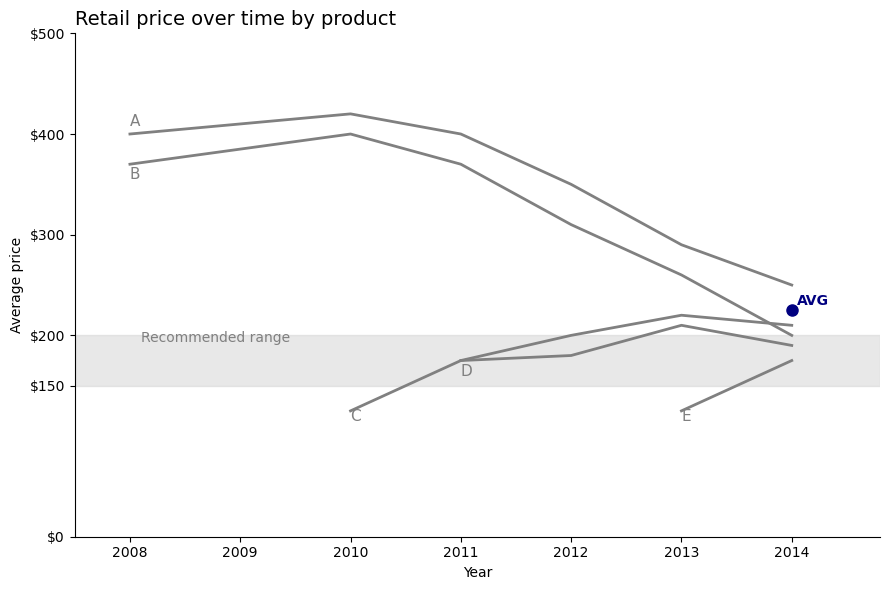

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(9, 6))

# data for each product line (estimated from the chart)
years_ab = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
product_a = [400, 410, 420, 400, 350, 290, 250]
product_b = [370, 385, 400, 370, 310, 260, 200]

years_c = [2010, 2011, 2012, 2013, 2014]
product_c = [125, 175, 200, 220, 210]

years_d = [2011, 2012, 2013, 2014]
product_d = [175, 180, 210, 190]

years_e = [2013, 2014]
product_e = [125, 175]

# recommended range shading
ax.axhspan(150, 200, color='lightgray', alpha=0.5)
ax.text(2008.1, 193, 'Recommended range', fontsize=10, color='gray')

# plot product lines in gray
ax.plot(years_ab, product_a, color='gray', linewidth=2)
ax.plot(years_ab, product_b, color='gray', linewidth=2)
ax.plot(years_c, product_c, color='gray', linewidth=2)
ax.plot(years_d, product_d, color='gray', linewidth=2)
ax.plot(years_e, product_e, color='gray', linewidth=2)

# label each product
ax.text(2008, 408, 'A', color='gray', fontsize=11)
ax.text(2008, 355, 'B', color='gray', fontsize=11)
ax.text(2010, 115, 'C', color='gray', fontsize=11)
ax.text(2011, 160, 'D', color='gray', fontsize=11)
ax.text(2013, 115, 'E', color='gray', fontsize=11)

# AVG dot at 2014
ax.plot(2014, 225, 'o', color='navy', markersize=8)
ax.text(2014.05, 230, 'AVG', fontsize=10, fontweight='bold', color='navy')

# formatting
ax.set_title('Retail price over time by product', fontsize=14, loc='left')
ax.set_xlabel('Year')
ax.set_ylabel('Average price')
ax.set_xlim(2007.5, 2014.8)
ax.set_ylim(0, 500)
ax.set_xticks(range(2008, 2015))
ax.set_yticks([0, 150, 200, 300, 400, 500])
ax.set_yticklabels(['$0', '$150', '$200', '$300', '$400', '$500'])

# clean up the chart like the book style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### What I tried / searched

- Searched "matplotlib axhspan shaded region" to figure out how to draw the recommended range band
- Searched "matplotlib remove top right border spines" to make the chart look cleaner like the book style
- Used `ax.text()` to place product labels directly on the chart instead of using a legend, which I found by searching "matplotlib annotate text on plot"
- Estimated the data points from the image since the book doesn't give exact numbers
- Tried using `plt.plot()` first but switched to `ax.plot()` so I could control the spines and formatting better